In [917]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.metrics import  r2_score
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from functools import reduce
import random
from sklearn.cluster import KMeans




# Data Loading

In [918]:
df = pd.read_csv('parkinsons_updrs.data')
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [920]:
# Rename columns
df.rename(columns={'Jitter(%)': 'Jitter_percent', 'Jitter(Abs)': 'Jitter_Abs',
                   'Jitter:RAP': 'Jitter_RAP', 'Jitter:PPQ5': 'Jitter_PPQ5',
                   'Jitter:DDP': 'Jitter_DDP', 'Shimmer(dB)': 'Shimmer_dB',
                   'Shimmer:APQ3': 'Shimmer_APQ3', 'Shimmer:APQ5': 'Shimmer_APQ5',
                   'Shimmer:APQ11': 'Shimmer_APQ11', 'Shimmer:DDA': 'Shimmer_DDA'}, inplace=True)

# Data Cleaning

In [921]:
# Check for duplicated rows
duplicated_rows = df.duplicated().any()
print("Duplicated rows?", duplicated_rows)

# Check for the number of rows with any missing/null values
rows_with_missing_values = df.isna().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing_values}")

Duplicated rows? False
Number of rows with missing values: 0


In [922]:
negative_test_times = df['test_time'].lt(0).sum()
print(f"Number of negative test times: {negative_test_times}")

Number of negative test times: 12


In [923]:
df=df[df['test_time']>0]
df=df.drop('subject#',axis=1)
df=df.drop('motor_UPDRS',axis=1)

In [924]:
df

,age,sex,test_time,total_UPDRS,Jitter_percent,Jitter_Abs,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


# Data Preprocessing

In [925]:
X = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS']

# Train a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Get coefficients of the features
feature_coefficients = lr.coef_

# Create a DataFrame to store feature names and coefficients
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})

# Sort features by coefficient magnitude (absolute value)
feature_coefficients_df['Abs_Coefficient'] = np.abs(feature_coefficients_df['Coefficient'])
feature_coefficients_df = feature_coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Set a threshold for coefficient magnitude
threshold = 20  

# Select features with coefficient magnitude above the threshold
selected_features = feature_coefficients_df[feature_coefficients_df['Abs_Coefficient'] > threshold]['Feature']

# Filter the DataFrame to keep only selected features
df = df[selected_features]

# Add the target variable 'total_UPDRS' back into the DataFrame
df['total_UPDRS'] = y

df


C:\Users\Asus\AppData\Local\Temp\ipykernel_4116\1498394258.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_UPDRS'] = y


,Jitter_Abs,Jitter_RAP,Shimmer_APQ3,Jitter_DDP,Shimmer_DDA,Jitter_PPQ5,Shimmer,Shimmer_APQ5,Shimmer_APQ11,Jitter_percent,DFA,total_UPDRS
0,0.000034,0.00401,0.01438,0.01204,0.04314,0.00317,0.02565,0.01309,0.01662,0.00662,0.54842,34.398
1,0.000017,0.00132,0.00994,0.00395,0.02982,0.00150,0.02024,0.01072,0.01689,0.00300,0.56477,34.894
2,0.000025,0.00205,0.00734,0.00616,0.02202,0.00208,0.01675,0.00844,0.01458,0.00481,0.54405,35.389
3,0.000027,0.00191,0.01106,0.00573,0.03317,0.00264,0.02309,0.01265,0.01963,0.00528,0.57794,35.810
4,0.000020,0.00093,0.00679,0.00278,0.02036,0.00130,0.01703,0.00929,0.01819,0.00335,0.56122,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0.000031,0.00167,0.00973,0.00500,0.02920,0.00168,0.01896,0.01133,0.01549,0.00406,0.55314,33.485
5871,0.000025,0.00119,0.01052,0.00358,0.03157,0.00147,0.02315,0.01277,0.01904,0.00297,0.56518,32.988
5872,0.000025,0.00152,0.01371,0.00456,0.04112,0.00187,0.02499,0.01456,0.01877,0.00349,0.57888,32.495
5873,0.000020,0.00128,0.00693,0.00383,0.02078,0.00151,0.01484,0.00870,0.01307,0.00281,0.56327,32.007


In [926]:
# Get both the maximum and minimum values for each feature
max_min_values = df.agg(['max', 'min'])

# Print the results
print("Maximum and Minimum values of each feature:")
print(max_min_values)

Maximum and Minimum values of each feature:
     Jitter_Abs  Jitter_RAP  Shimmer_APQ3  Jitter_DDP  Shimmer_DDA  \
max    0.000446     0.05754       0.16267     0.17263      0.48802   
min    0.000002     0.00033       0.00161     0.00098      0.00484   

     Jitter_PPQ5  Shimmer  Shimmer_APQ5  Shimmer_APQ11  Jitter_percent  \
max      0.06956  0.26863       0.16702        0.27546         0.09999   
min      0.00043  0.00306       0.00194        0.00249         0.00083   

         DFA  total_UPDRS  
max  0.86560       54.992  
min  0.51404        7.000  


Feature: Jitter_Abs
Whiskers:
  - (array([1, 1]), array([2.345e-05, 8.190e-06]))
  - (array([1, 1]), array([5.2515e-05, 8.2390e-05]))
Quartiles:
  - Q1: [2.345e-05 8.190e-06]
  - Q2 (Median): 3.729e-05
  - Q3: [5.2515e-05 8.2390e-05]
Feature: Jitter_RAP
Whiskers:
  - (array([1, 1]), array([0.001535, 0.00081 ]))
  - (array([1, 1]), array([0.0034025, 0.00495  ]))
Quartiles:
  - Q1: [0.001535 0.00081 ]
  - Q2 (Median): 0.00212
  - Q3: [0.0034025 0.00495  ]
Feature: Shimmer_APQ3
Whiskers:
  - (array([1, 1]), array([0.0097075, 0.00325  ]))
  - (array([1, 1]), array([0.0238025, 0.04225  ]))
Quartiles:
  - Q1: [0.0097075 0.00325  ]
  - Q2 (Median): 0.01438
  - Q3: [0.0238025 0.04225  ]
Feature: Jitter_DDP
Whiskers:
  - (array([1, 1]), array([0.004615, 0.00242 ]))
  - (array([1, 1]), array([0.0102175, 0.01485  ]))
Quartiles:
  - Q1: [0.004615 0.00242 ]
  - Q2 (Median): 0.006365
  - Q3: [0.0102175 0.01485  ]
Feature: Shimmer_DDA
Whiskers:
  - (array([1, 1]), array([0.029115, 0.00976 ]))
  - (ar

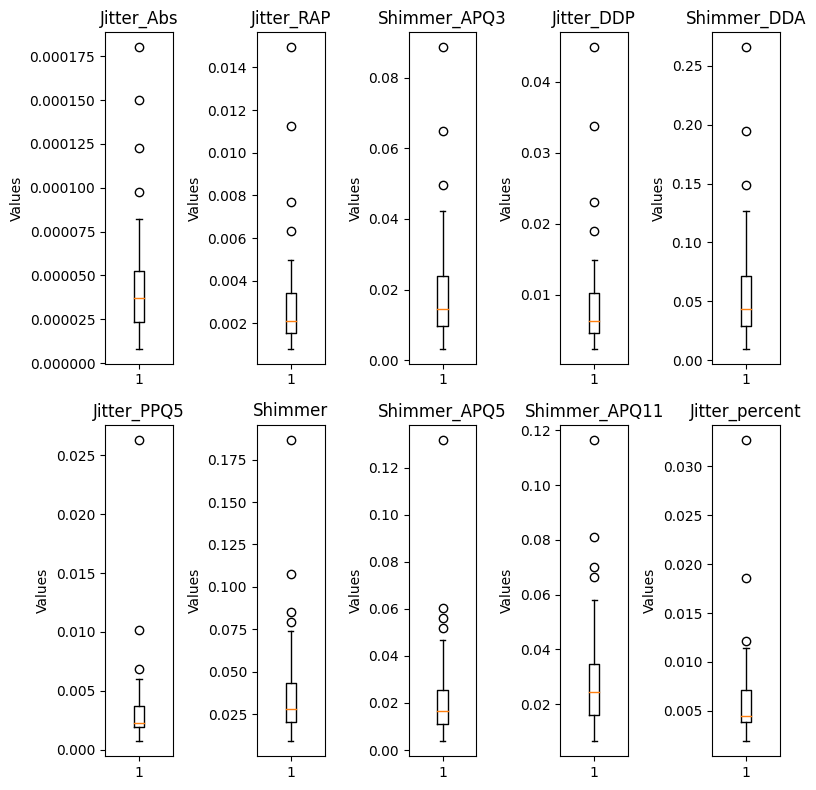

In [928]:
# Calculate the number of rows and columns for subplots
num_features = len(df.columns)
num_cols = 5
num_rows = (num_features + 1) // num_cols

# Set the figure size based on the number of features
fig_width = 8
fig_height = 4 * num_rows

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Iterate through each feature and generate a box plot
for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    # Generate box plot for the current feature
    bp = ax.boxplot(df[col])  
    
    # Print box plot values
    print(f"Feature: {col}")
    print("Whiskers:")
    for whisker in bp['whiskers']:
        print(f"  - {whisker.get_data()}")
    print("Quartiles:")
    print(f"  - Q1: {bp['whiskers'][0].get_data()[1]}")
    print(f"  - Q2 (Median): {np.median(df[col])}")
    print(f"  - Q3: {bp['whiskers'][1].get_data()[1]}")

    
    ax.set_title(col)  # Set title as feature name
    ax.set_ylabel('Values')  # Set y-axis label

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()




# Data Modeling

## Fuzzy System 

In [929]:
mf_val = np.array([

    #JITTER_PERCENT
    0, 0.005,
    0.00358, 0.0049, 0.0068, 
    0.004, 0.1,

    #JITTER_ABS
    0, 3.46e-05,
    2.2425e-05, 3.453e-05, 5.334e-05,
    3.44e-05, 4.5e-04,

    #JITTER_RAP
    0, 0.0023, 
    0.00158, 0.00225, 0.00329, 
    0.0022, 0.06,  

    #JITTER_PPQ5
    0, 0.0025, 
    0.001825, 0.00249, 0.00347, 
    0.0024, 0.07,

    #JITTER_DDP
    0, 0.0068, 
    0.00473, 0.00675, 0.00988, 
    0.0067, 0.18,

    #SHIMMER
    0, 0.0276, 
    0.01911, 0.02753, 0.039775, 
    0.0275, 0.27,

    #SHIMMER_APQ3
    0, 0.0138, 
    0.00928, 0.0137, 0.020605, 
    0.0136, 0.017,

    #SHIMMER_APQ5
    0, 0.016, 
    0.01079, 0.01594, 0.023775, 
    0.015, 0.17,

    #SHIMMER_APQ11
    0, 0.0228, 
    0.01566, 0.02271, 0.032725, 
    0.0226, 0.28,

    #SHIMMER_DDA
    0, 0.042, 
    0.02783, 0.04111, 0.061805, 
    0.041, 0.49,

    #DFA
    0, 0.644, 
    0.5961, 0.64355, 0.71148, 
    0.643, 0.87, 

    #TOTAL_UPDRS
    0, 30,
    7.0, 27.522, 36.4005,
    20, 55
])




In [930]:
def create_fuzzy_logic_system():
    # Define universe variables for each feature
    Jitter_percent_universe = np.linspace(df['Jitter_percent'].min(), df['Jitter_percent'].max(), 100)
    Jitter_Abs_universe = np.linspace(df['Jitter_Abs'].min(), df['Jitter_Abs'].max(), 100)
    Jitter_RAP_universe = np.linspace(df['Jitter_RAP'].min(), df['Jitter_RAP'].max(), 100)
    Jitter_PPQ5_universe = np.linspace(df['Jitter_PPQ5'].min(), df['Jitter_PPQ5'].max(), 100)
    Jitter_DDP_universe = np.linspace(df['Jitter_DDP'].min(), df['Jitter_DDP'].max(), 100)
    Shimmer_universe = np.linspace(df['Shimmer'].min(), df['Shimmer'].max(), 100)
    Shimmer_APQ3_universe = np.linspace(df['Shimmer_APQ3'].min(), df['Shimmer_APQ3'].max(), 100)
    Shimmer_APQ5_universe = np.linspace(df['Shimmer_APQ5'].min(), df['Shimmer_APQ5'].max(), 100)
    Shimmer_APQ11_universe = np.linspace(df['Shimmer_APQ11'].min(), df['Shimmer_APQ11'].max(), 100)
    Shimmer_DDA_universe = np.linspace(df['Shimmer_DDA'].min(), df['Shimmer_DDA'].max(), 100)
    DFA_universe = np.linspace(df['DFA'].min(), df['DFA'].max(), 100)
    total_UPDRS_universe = np.linspace(df['total_UPDRS'].min(), df['total_UPDRS'].max(), 100)

    # Create fuzzy variables for each feature
    Jitter_percent = ctrl.Antecedent(Jitter_percent_universe, 'Jitter_percent')
    Jitter_Abs = ctrl.Antecedent(Jitter_Abs_universe, 'Jitter_Abs')
    Jitter_RAP = ctrl.Antecedent(Jitter_RAP_universe, 'Jitter_RAP')
    Jitter_PPQ5 = ctrl.Antecedent(Jitter_PPQ5_universe, 'Jitter_PPQ5')
    Jitter_DDP = ctrl.Antecedent(Jitter_DDP_universe, 'Jitter_DDP')
    Shimmer = ctrl.Antecedent(Shimmer_universe, 'Shimmer')
    Shimmer_APQ3 = ctrl.Antecedent(Shimmer_APQ3_universe, 'Shimmer_APQ3')
    Shimmer_APQ5 = ctrl.Antecedent(Shimmer_APQ5_universe, 'Shimmer_APQ5')
    Shimmer_APQ11 = ctrl.Antecedent(Shimmer_APQ11_universe, 'Shimmer_APQ11')
    Shimmer_DDA = ctrl.Antecedent(Shimmer_DDA_universe, 'Shimmer_DDA')
    DFA = ctrl.Antecedent(DFA_universe, 'DFA')
    total_UPDRS = ctrl.Consequent(total_UPDRS_universe, 'total_UPDRS')

    # Define membership functions for each variable
    Jitter_percent['low'] = fuzz.zmf(Jitter_percent.universe, mf_val[0], mf_val[1])
    Jitter_percent['medium'] = fuzz.trimf(Jitter_percent.universe, [mf_val[2], mf_val[3], mf_val[4]])
    Jitter_percent['high'] = fuzz.smf(Jitter_percent.universe, mf_val[5], mf_val[6])

    # Reassign the values for Jitter_Abs
    Jitter_Abs['low'] = fuzz.zmf(Jitter_Abs.universe, mf_val[7], mf_val[8])
    Jitter_Abs['medium'] = fuzz.trimf(Jitter_Abs.universe, [mf_val[9], mf_val[10], mf_val[11]])
    Jitter_Abs['high'] = fuzz.smf(Jitter_Abs.universe, mf_val[12], mf_val[13])

    # Reassign the values for Jitter_RAP
    Jitter_RAP['low'] = fuzz.zmf(Jitter_RAP.universe, mf_val[14], mf_val[15])
    Jitter_RAP['medium'] = fuzz.trimf(Jitter_RAP.universe, [mf_val[16], mf_val[17], mf_val[18]])
    Jitter_RAP['high'] = fuzz.smf(Jitter_RAP.universe, mf_val[19], mf_val[20])

    # Reassign the values for Jitter_PPQ5
    Jitter_PPQ5['low'] = fuzz.zmf(Jitter_PPQ5.universe, mf_val[21], mf_val[22])
    Jitter_PPQ5['medium'] = fuzz.trimf(Jitter_PPQ5.universe, [mf_val[23], mf_val[24], mf_val[25]])
    Jitter_PPQ5['high'] = fuzz.smf(Jitter_PPQ5.universe, mf_val[26], mf_val[27])

    # Reassign the values for Jitter_DDP
    Jitter_DDP['low'] = fuzz.zmf(Jitter_DDP.universe, mf_val[28], mf_val[29])
    Jitter_DDP['medium'] = fuzz.trimf(Jitter_DDP.universe, [mf_val[30], mf_val[31], mf_val[32]])
    Jitter_DDP['high'] = fuzz.smf(Jitter_DDP.universe, mf_val[33], mf_val[34])

    # Reassign the values for Shimmer
    Shimmer['low'] = fuzz.zmf(Shimmer.universe, mf_val[35], mf_val[36])
    Shimmer['medium'] = fuzz.trimf(Shimmer.universe, [mf_val[37], mf_val[38], mf_val[39]])
    Shimmer['high'] = fuzz.smf(Shimmer.universe, mf_val[40], mf_val[41])

    # Reassign the values for Shimmer_APQ3
    Shimmer_APQ3['low'] = fuzz.zmf(Shimmer_APQ3.universe, mf_val[42], mf_val[43])
    Shimmer_APQ3['medium'] = fuzz.trimf(Shimmer_APQ3.universe, [mf_val[44], mf_val[45], mf_val[46]])
    Shimmer_APQ3['high'] = fuzz.smf(Shimmer_APQ3.universe, mf_val[47], mf_val[48])

    # Reassign the values for Shimmer_APQ5
    Shimmer_APQ5['low'] = fuzz.zmf(Shimmer_APQ5.universe, mf_val[49], mf_val[50])
    Shimmer_APQ5['medium'] = fuzz.trimf(Shimmer_APQ5.universe, [mf_val[51], mf_val[52], mf_val[53]])
    Shimmer_APQ5['high'] = fuzz.smf(Shimmer_APQ5.universe, mf_val[54], mf_val[55])

    # Reassign the values for Shimmer_APQ11
    Shimmer_APQ11['low'] = fuzz.zmf(Shimmer_APQ11.universe, mf_val[56], mf_val[57])
    Shimmer_APQ11['medium'] = fuzz.trimf(Shimmer_APQ11.universe, [mf_val[58], mf_val[59], mf_val[60]])
    Shimmer_APQ11['high'] = fuzz.smf(Shimmer_APQ11.universe, mf_val[61], mf_val[62])

    # Reassign the values for Shimmer_DDA
    Shimmer_DDA['low'] = fuzz.zmf(Shimmer_DDA.universe, mf_val[63], mf_val[64])
    Shimmer_DDA['medium'] = fuzz.trimf(Shimmer_DDA.universe, [mf_val[65], mf_val[66], mf_val[67]])
    Shimmer_DDA['high'] = fuzz.smf(Shimmer_DDA.universe, mf_val[68], mf_val[69])


    DFA['low'] = fuzz.zmf(DFA.universe, mf_val[70], mf_val[71])
    DFA['medium'] = fuzz.trimf(DFA.universe, [mf_val[72], mf_val[73], mf_val[74]])
    DFA['high'] = fuzz.smf(DFA.universe, mf_val[75], mf_val[76])

    total_UPDRS['low'] = fuzz.zmf(total_UPDRS.universe, mf_val[77], mf_val[78])
    total_UPDRS['medium'] = fuzz.trimf(total_UPDRS.universe, [mf_val[79], mf_val[80], mf_val[81]])
    total_UPDRS['high'] = fuzz.smf(total_UPDRS.universe, mf_val[82], mf_val[83])


    fuzzy_vars = [Jitter_percent, Jitter_Abs, Jitter_RAP, Jitter_PPQ5, Jitter_DDP, Shimmer, Shimmer_APQ3, 
                  Shimmer_APQ5, Shimmer_APQ11, Shimmer_DDA, DFA, total_UPDRS]
    
    return fuzzy_vars
    

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


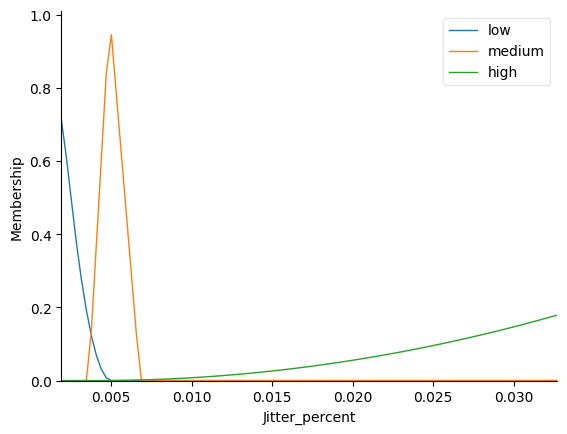

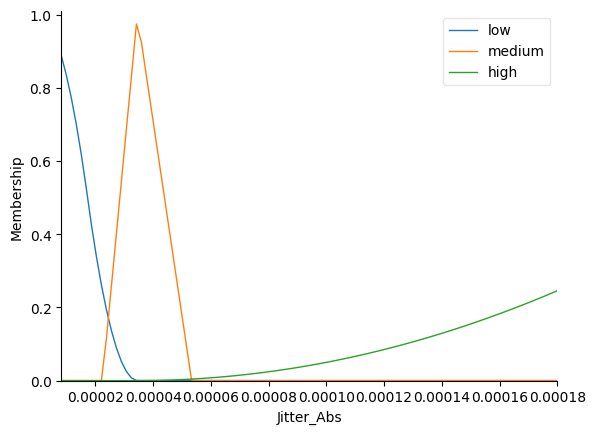

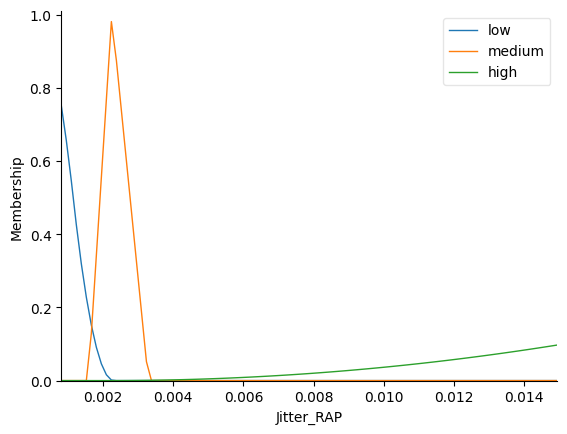

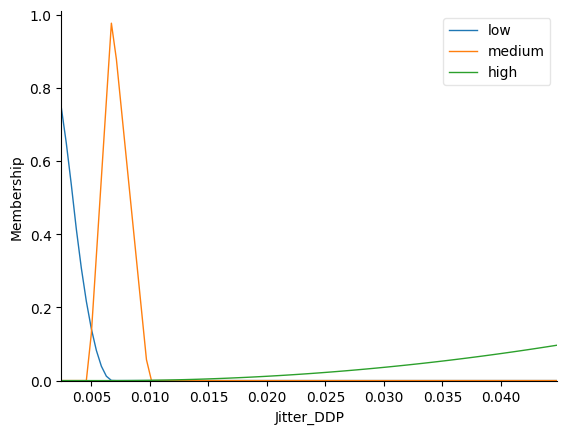

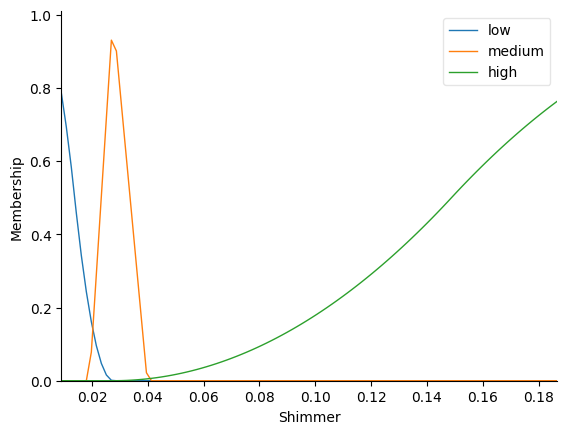

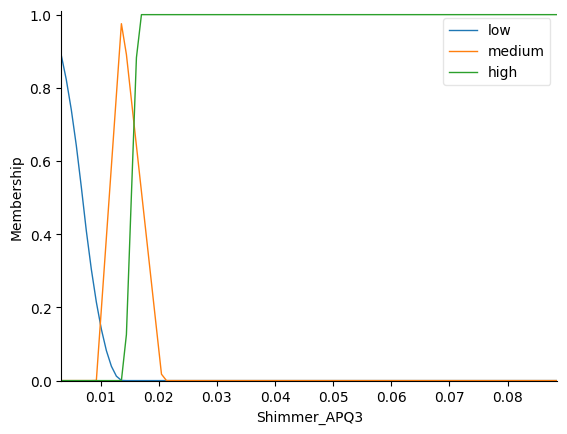

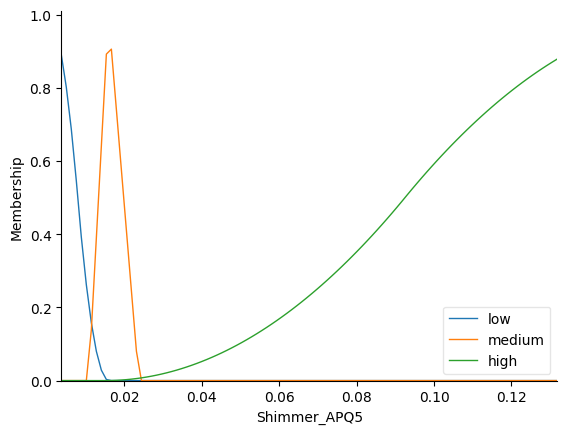

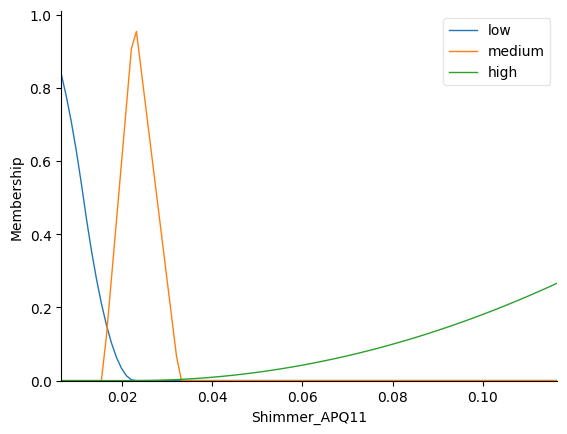

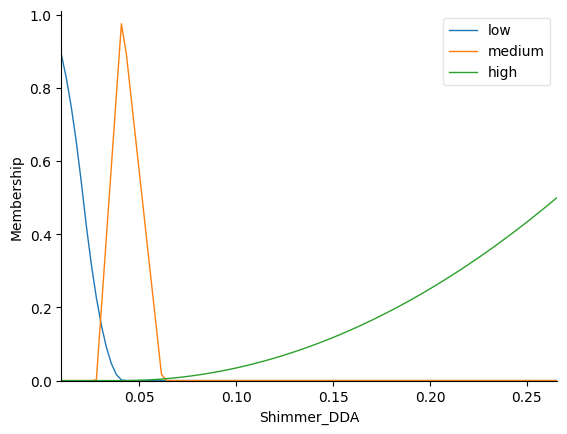

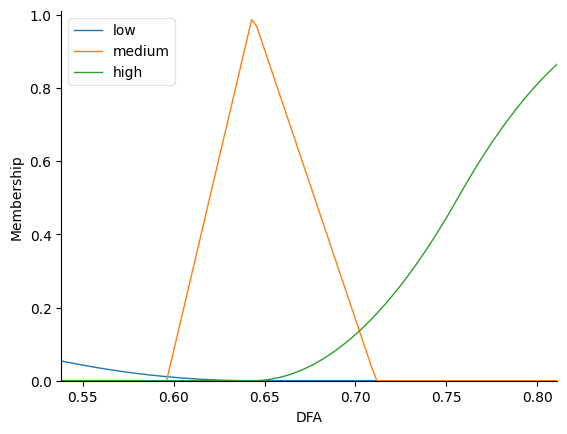

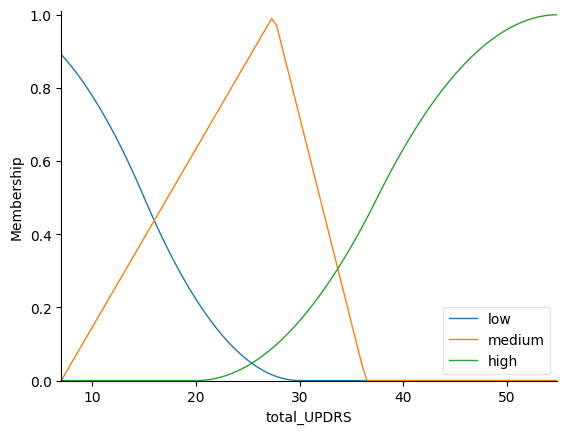

In [1235]:
# Call the create_fuzzy_logic_system function to get the fuzzy variables
fuzzy_vars = create_fuzzy_logic_system()

fuzzy_vars[0].view()

fuzzy_vars[1].view()

fuzzy_vars[2].view()

fuzzy_vars[4].view()

fuzzy_vars[5].view()

fuzzy_vars[6].view()

fuzzy_vars[7].view()

fuzzy_vars[8].view()

fuzzy_vars[9].view()

fuzzy_vars[10].view()

fuzzy_vars[11].view()






# Evolutionary Algorithm

## Random Population Generation

In [1225]:
def generate_rule(num_features, num_states_per_feature, min_num_features=8, fuzzy_vars=None):
    while True:
        rule = []
        # Randomly select features for the rule
        selected_features = np.random.choice(num_features, size=np.random.randint(min_num_features, num_features + 1), replace=False)
        for feature in selected_features:
            state = np.random.randint(num_states_per_feature[feature])
            rule.append((feature, state))
        # Consequent: Assuming 3 classes: low, medium, high
        consequent = np.random.choice(['low', 'medium', 'high'])
        rule.append(consequent)

        antecedents = []
        for feature_index, state in rule[:-1]:
            term_name = 'low' if state == 0 else 'medium' if state == 1 else 'high'
            antecedents.append(fuzzy_vars[feature_index][term_name])

        if antecedents:
            combined_antecedent = antecedents[0]
            for antecedent in antecedents[1:]:
                if np.random.rand() > 0.5:  # Randomly choose AND or OR
                    combined_antecedent = combined_antecedent & antecedent
                else:
                    combined_antecedent = combined_antecedent | antecedent
            consequent_state = rule[-1]
            term_name = 'low' if consequent_state == 'low' else 'medium' if consequent_state == 'medium' else 'high'
            fuzzy_rule = ctrl.Rule(antecedent=combined_antecedent, consequent=fuzzy_vars[-1][term_name])
            return fuzzy_rule


def initialize_population(population_size, num_rules, num_features, num_states_per_feature):
    population = []
    fuzzy_vars = create_fuzzy_logic_system()  

    for _ in range(population_size):
        chromosome = []
        # Randomly determine the number of rules to generate for each individual in the population
        num_rules_for_individual = np.random.randint(1, num_rules + 1)
        for _ in range(num_rules_for_individual):
            rule = generate_rule(num_features, num_states_per_feature, fuzzy_vars=fuzzy_vars)
            if rule:  # Check if a valid rule is generated
                chromosome.append(rule)
        population.append(chromosome)
    print(str(population))
    return population


### Evolutionary Strategy 1

In [1209]:
def predict(chromosome, data):
    ctrl_sys = ctrl.ControlSystem(chromosome)
    inference = ctrl.ControlSystemSimulation(ctrl_sys)
    predictions = []
    for index, row in data.iterrows():
        for key, value in row.items():
            inference.input[key] = value
        inference.compute()
        prediction = inference.output['total_UPDRS']
        predictions.append(prediction)
    return predictions


In [1210]:
# Fitness function A
def fitness_function_A(chromosome, data, labels):
    predictions = predict(chromosome, data)
    accuracy = r2_score(labels, predictions)
    complexity = len(chromosome)
    w1 = 0.9
    w2 = 0.1
    fitness_value = w1 * accuracy - w2 * complexity

    print("Fitness A fitness value : " + str(fitness_value))
    
    return fitness_value

In [1211]:
# Selection algorithm (Tournament Selection)
def tournament_selection(population, fitness_scores, tournament_size):
  selected = []
  population_size = len(population)

  while len(selected) < population_size:
      # Select 'tournament_size' random individuals from the population
      tournament = random.sample(list(enumerate(population)), tournament_size)

      # Determine the winner based on the highest fitness score
      winner = max(tournament, key=lambda x: fitness_scores[x[0]])

      # Append the winner's chromosome to the selected list
      selected.append(winner[1])

  return selected


In [1212]:
# Cross-Over Algorithm (One-point Cross-over)
def one_point_crossover(parent1, parent2):
    if len(parent1) > len(parent2):
        parent1, parent2 = parent2, parent1

    if len(parent1) <= 1:
        return parent1[:], parent2[:]

    crossover_point = random.randint(1, len(parent1) - 1)

    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2



In [1213]:
# Mutation Algorithm (Mutation on Consequent)
def mutate_consequent(chromosome):
    rule = random.choice(chromosome)
    new_output_choice = random.choice(['low', 'medium', 'high',])
    new_consequent = fuzzy_vars[11][new_output_choice]

    if rule.consequent != new_consequent:
        rule.consequent = new_consequent

    return chromosome

In [1216]:
# Define Evolutionary Algorithm
def genetic_algorithm_A(population_size, data, labels, num_generations, num_rules, num_features, mutation_rate, num_states_per_feature, tournament_size, crossover_rate):
    fuzzy_population = initialize_population(population_size, num_rules, num_features, num_states_per_feature)
    best_score = float('-inf')
    best_chromosome = None
    stagnation_counter = 0
    best_scores = []
    best_chromosomes = []


    for generation in range(num_generations):
        fitness_scores = [fitness_function_A(chromosome, data, labels) for chromosome in fuzzy_population]

        max_fitness = max(fitness_scores)

        if max_fitness > best_score:
            best_score = max_fitness
            best_chromosome = fuzzy_population[fitness_scores.index(max_fitness)]
            best_chromosomes.append(best_chromosome)
            stagnation_counter = 0
        else:
            stagnation_counter += 1

        if stagnation_counter > 5:
            mutation_rate = min(1.0, mutation_rate + 0.05)
        else:
            mutation_rate = max(0.1, mutation_rate - 0.01)

        # Elitism: Keep the best chromosome in the next generation
        next_generation = [best_chromosome]

        selected = tournament_selection(fuzzy_population, fitness_scores, tournament_size)

        while len(next_generation) < population_size:
            if random.random() < crossover_rate and len(selected) > 1:
                parent1, parent2 = random.sample(selected, 2)
                offspring1, offspring2 = one_point_crossover(parent1, parent2)
                next_generation.extend([offspring1, offspring2])
            else:
                next_generation.extend(random.sample(selected, 2))

            next_generation = next_generation[:population_size]

        for idx in range(len(next_generation)):
            if random.random() < mutation_rate:
                next_generation[idx] = mutate_consequent(next_generation[idx])

        population = next_generation
        best_scores.append(best_score)

        print(f"Generation {generation + 1}, Best Score: {best_score}")

    return best_scores, best_chromosomes

[[IF (((((((Shimmer_APQ3[medium] OR Jitter_DDP[low]) OR Jitter_PPQ5[high]) OR Shimmer[high]) OR Jitter_percent[medium]) OR DFA[low]) OR Jitter_RAP[high]) OR Shimmer_APQ5[medium]) OR Jitter_Abs[high] THEN total_UPDRS[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF ((((((Shimmer_DDA[medium] OR Jitter_DDP[low]) OR DFA[medium]) OR Jitter_Abs[medium]) OR Jitter_PPQ5[high]) OR Jitter_RAP[low]) OR Shimmer_APQ11[low]) OR Shimmer[medium] THEN total_UPDRS[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((((((((Shimmer_DDA[high] OR Jitter_Abs[low]) OR Shimmer_APQ3[high]) OR Jitter_RAP[high]) OR DFA[medium]) OR Jitter_percent[medium]) OR Jitter_PPQ5[high]) OR Shimmer_APQ11[medium]) OR Shimmer[low]) OR Shimmer_APQ5[medium]) OR Jitter_DDP[medium] THEN total_UPDRS[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((((((Shimmer_APQ11[medium] OR DFA[low]) OR Shimmer_APQ3[high]) OR Jitter_DDP[low]) OR Shimmer_DDA[high])

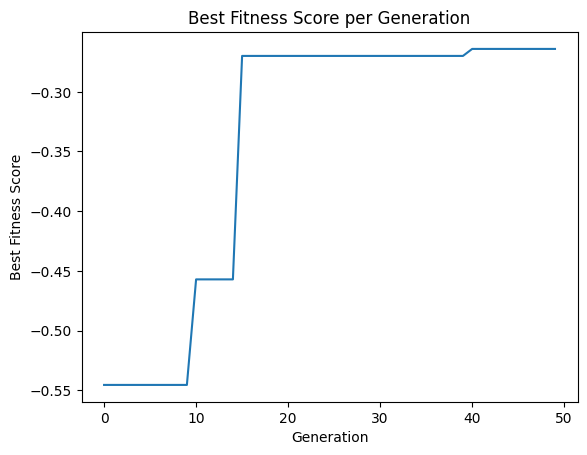

In [940]:
# Define your dataset and labels
data = df.drop(['total_UPDRS'], axis=1)
labels = df['total_UPDRS']

# Define parameters
crossover_rate = 0.8
tournament_size = 5
num_generations = 50
num_features = 11
mutation_rate = 0.5
population_size = 30
threshold = 0.3
num_states_per_feature = [3, 3, 3, 3, 3,
                          3, 3, 3, 3, 3, 3]  # List containing the number of states for each feature

# Run genetic algorithm for Fitness Function A
best_scores, best_chromosomes = genetic_algorithm_A(population_size, data, labels, num_generations, num_features, mutation_rate, num_states_per_feature, tournament_size, crossover_rate)

 # Plotting the best scores
plt.plot(best_scores)
plt.title('Best Fitness Score per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.show()

## Best Chromosomes Analysis

In [941]:
best_chromosomes

[[IF ((((((Shimmer_APQ3[high] OR DFA[medium]) OR Jitter_PPQ5[medium]) OR Shimmer_DDA[medium]) OR Jitter_Abs[low]) OR Shimmer_APQ5[high]) OR Jitter_percent[medium]) OR Shimmer_APQ11[high] THEN total_UPDRS[low]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax,
  IF ((((((((Jitter_percent[high] OR Jitter_DDP[low]) OR Shimmer_APQ3[high]) OR Jitter_RAP[low]) OR DFA[high]) OR Shimmer_DDA[high]) OR Shimmer[medium]) OR Jitter_PPQ5[high]) OR Jitter_Abs[low]) OR Shimmer_APQ11[medium] THEN total_UPDRS[high]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax],
 [IF (((((((((Shimmer_APQ5[low] OR Jitter_percent[medium]) OR Jitter_PPQ5[low]) OR Shimmer_DDA[high]) OR Jitter_DDP[low]) OR Shimmer[low]) OR DFA[medium]) OR Jitter_RAP[high]) OR Shimmer_APQ11[medium]) OR Jitter_Abs[medium]) OR Shimmer_APQ3[low] THEN total_UPDRS[low]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax,
  IF (((((((DFA[low] OR Shimmer_APQ5[medium]) OR Jitter_DDP[medium

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


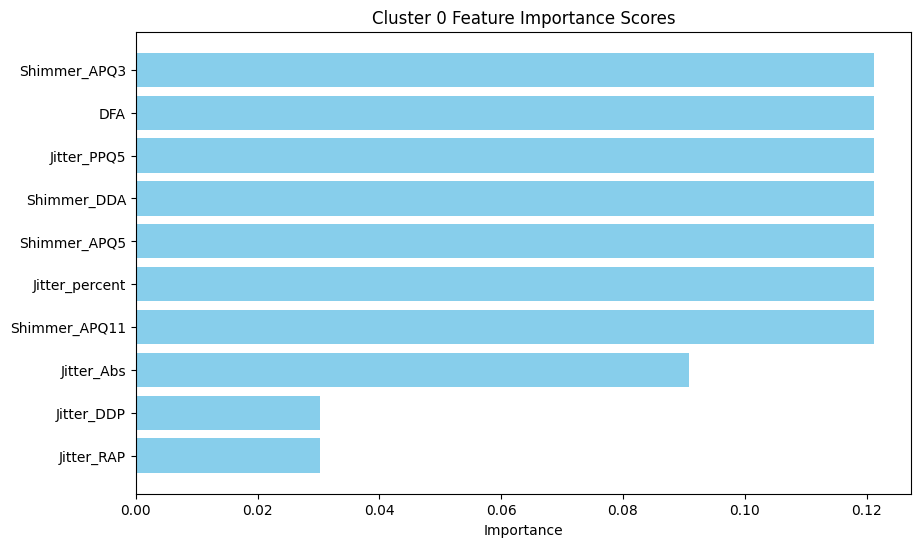

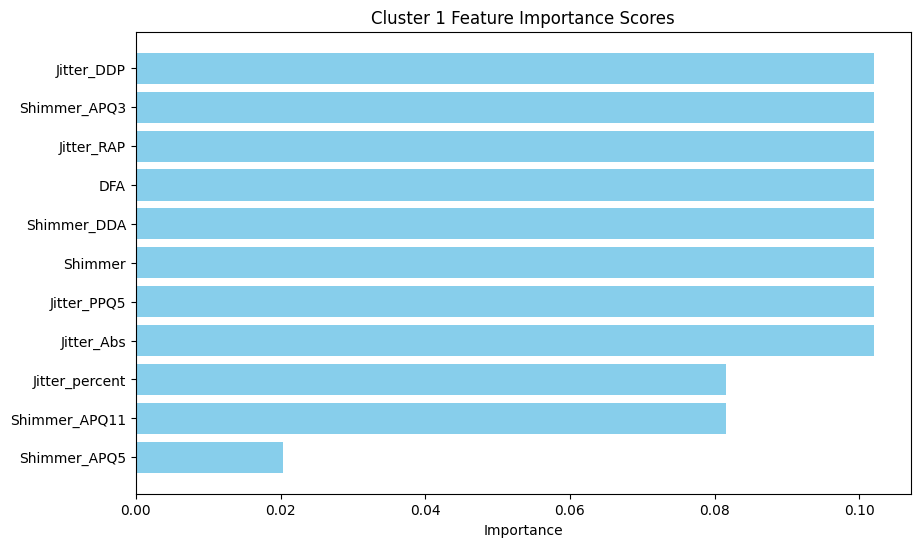

In [968]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
rules = best_chromosomes
all_features = [[condition["feature"] for condition in rule["conditions"]] for rule in rules]

# Convert features into numerical representation
unique_features = list(set(feature for rule_features in all_features for feature in rule_features))
numerical_representation = np.zeros((len(rules), len(unique_features)))

for i, rule_features in enumerate(all_features):
    for j, feature in enumerate(unique_features):
        if feature in rule_features:
            numerical_representation[i, j] = 1

# Perform unsupervised clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(numerical_representation)

# Analyze clusters for feature importance
cluster_feature_counts = {cluster: {} for cluster in range(num_clusters)}
for i, cluster_label in enumerate(cluster_labels):
    rule_features = all_features[i]
    for feature in rule_features:
        cluster_feature_counts[cluster_label][feature] = cluster_feature_counts[cluster_label].get(feature, 0) + 1

# Calculate feature importance scores for each cluster
cluster_feature_importance = {}
for cluster, feature_counts in cluster_feature_counts.items():
    total_occurrences = sum(feature_counts.values())
    cluster_feature_importance[cluster] = {feature: count / total_occurrences for feature, count in feature_counts.items()}

# Plot feature importance scores for each cluster
for cluster, importance_scores in cluster_feature_importance.items():
    sorted_importance_scores = dict(sorted(importance_scores.items(), key=lambda item: item[1], reverse=True))
    features = list(sorted_importance_scores.keys())
    importances = list(sorted_importance_scores.values())
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Cluster {cluster} Feature Importance Scores')
    plt.gca().invert_yaxis() 
    plt.show()


### Evolutinary Strategy 2

In [1180]:
# Fitness function B
def fitness_function_B(chromosome):
    chromosome_array = np.array([rule.antecedent for rule in chromosome])
    if len(chromosome_array.shape) == 1:  # Check if it's a 1D array
        chromosome_array = np.array([chromosome_array])  # Reshape to 2D array if necessary
    coverage = np.count_nonzero(chromosome_array[:, :-1] != -1)
    complexity = len(chromosome)
    w1 = 0.9
    w2 = 0.1
    fitness_value = (coverage * w1) - (complexity * w2)  
    print("Fitness B fitness value : " + str(fitness_value))
    return fitness_value


In [1170]:
# Selection algorithm (Roulette Wheel Selection)
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    selected = []
    
    for _ in range(len(population)):
        pick = random.random()
        current = 0
        for individual, probability in zip(population, probabilities):
            current += probability
            if current > pick:
                selected.append(individual)
                break

    return selected

# Cross-over algorithm (Uniform Cross-over)
def uniform_crossover(parent1, parent2):
    min_length = min(len(parent1), len(parent2))
    offspring1, offspring2 = [], []

    # Crossover for the length of the shorter parent
    for i in range(min_length):
        if random.random() < 0.5:
            offspring1.append(parent1[i])
            offspring2.append(parent2[i])
        else:
            offspring1.append(parent2[i])
            offspring2.append(parent1[i])

    # Handle excess genes in the longer parent
    if len(parent1) > min_length:
        offspring1.extend(parent1[min_length:])
    if len(parent2) > min_length:
        offspring2.extend(parent2[min_length:])

    return offspring1, offspring2

# Mutation algorithm (Chromosome Mutation)
def mutate_rule(rule, fuzzy_vars, mutation_rate):
    if random.random() < mutation_rate:
        # Mutate antecedent
        chosen_feature_index = np.random.randint(len(fuzzy_vars) - 1)  
        new_label = random.choice(['low', 'medium', 'high'])
        # Create a new antecedent term based on random selection
        new_antecedent = fuzzy_vars[chosen_feature_index][new_label]
        combined_antecedent = rule.antecedent | new_antecedent
        # Create a new rule with the mutated antecedent and consequent
        new_rule = ctrl.Rule(antecedent=combined_antecedent, consequent=rule.consequent)
        return new_rule  # Return the new, mutated rule
    else:
        return rule

# Example of applying mutation across a chromosome (list of rules)
def mutate_chromosome(chromosome, fuzzy_vars, mutation_rate):
    return [mutate_rule(rule, fuzzy_vars, mutation_rate) for rule in chromosome]



In [1229]:
def genetic_algorithm_B(population_size, num_generations, num_rules, num_features, mutation_rate, num_states_per_feature, crossover_rate, fuzzy_vars):
    # Initialize the population
    fuzzy_population = initialize_population(population_size, num_rules, num_features, num_states_per_feature)

    # Initialize variables to store the best solution and its fitness
    best_score = float('-inf')
    best_chromosome = None
    
    # Track the best score and best chromosome for each generation
    best_scores = []
    best_chromosomes = []

    # Track stagnation to adjust mutation rate
    stagnation_counter = 0

    # Main loop for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for the current population
        fitness_scores = [fitness_function_B(chromosome) for chromosome in fuzzy_population]
        
        # Find the maximum fitness score in this generation
        max_fitness = max(fitness_scores)

        # Update best score and best chromosome if a better solution is found
        if max_fitness > best_score:
            best_score = max_fitness
            best_chromosome = fuzzy_population[fitness_scores.index(max_fitness)]
            best_chromosomes.append(best_chromosome)
            stagnation_counter = 0
        else:
            stagnation_counter += 1

        # Adjust mutation rate based on stagnation
        if stagnation_counter > 5:
            mutation_rate = min(1.0, mutation_rate + 0.05)
        else:
            mutation_rate = max(0.1, mutation_rate - 0.01)

        # Elitism: Keep the best chromosome in the next generation
        next_generation = [best_chromosome]

        # Select parents using roulette wheel selection
        selected = roulette_wheel_selection(fuzzy_population, fitness_scores)

        # Crossover and mutate to generate offspring
        while len(next_generation) < population_size:
            if random.random() < crossover_rate and len(selected) > 1:
                parent1, parent2 = random.sample(selected, 2)
                offspring1, offspring2 = uniform_crossover(parent1, parent2)
                next_generation.extend([offspring1, offspring2])
            else:
                next_generation.extend(random.sample(selected, 2))

            next_generation = next_generation[:population_size]

        next_generation = [mutate_chromosome(chromosome, fuzzy_vars, mutation_rate) for chromosome in next_generation]

        # Store the best score for this generation
        best_scores.append(best_score)

        # Print progress
        print(f"Generation {generation + 1}, Best Score: {best_score}")

    # Return the list of best scores and best chromosomes for each generation
    return best_scores, best_chromosomes





[[IF (((((((Shimmer[high] OR Shimmer_APQ5[high]) OR DFA[high]) OR Shimmer_APQ11[high]) OR Jitter_RAP[medium]) OR Shimmer_DDA[low]) OR Jitter_DDP[low]) OR Jitter_percent[low]) OR Jitter_Abs[medium] THEN total_UPDRS[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((((((Jitter_percent[medium] OR Shimmer[high]) OR Jitter_PPQ5[high]) OR Shimmer_DDA[high]) OR Jitter_Abs[low]) OR Jitter_DDP[medium]) OR Shimmer_APQ11[medium]) OR DFA[low]) OR Jitter_RAP[high] THEN total_UPDRS[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((((((((Jitter_DDP[medium] OR Jitter_RAP[medium]) OR Jitter_percent[medium]) OR Shimmer_APQ11[low]) OR Shimmer_APQ3[high]) OR Shimmer[medium]) OR Jitter_PPQ5[medium]) OR DFA[low]) OR Shimmer_DDA[medium]) OR Jitter_Abs[medium]) OR Shimmer_APQ5[medium] THEN total_UPDRS[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF ((((((((Jitter_DDP[low] OR Jitter_percent[low]) OR Shimmer[high]) OR DFA[high

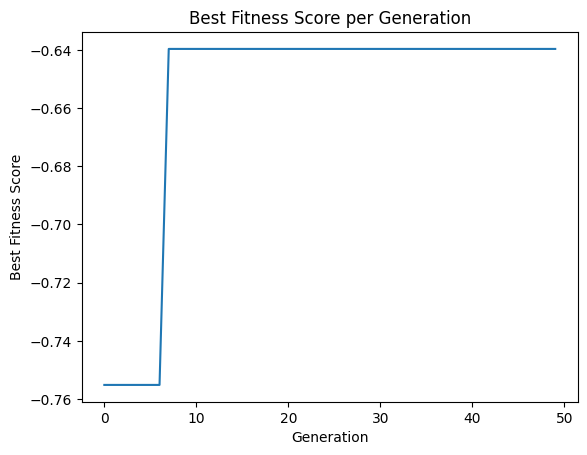

In [1238]:
# Define your dataset and labels
data = df.drop(['total_UPDRS'], axis=1)
labels = df['total_UPDRS']

# Define parameters
crossover_rate = 0.8
num_generations = 50
num_features = 11
num_parents = 4
mutation_rate = 0.5
population_size = 30
num_states_per_feature = [3, 3, 3, 3, 3,
                          3, 3, 3, 3, 3, 3]  # List containing the number of states for each feature

# Run genetic algorithm for Fitness Function B
best_scores, best_chromosomes = genetic_algorithm_B(population_size, num_generations, num_features, mutation_rate, num_states_per_feature, crossover_rate,fuzzy_vars)

# Plotting the best scores
plt.plot(best_scores)
plt.title('Best Fitness Score per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.show()



### Best Chromosome Analysis

In [1239]:
best_chromosomes

[[IF (((((((((DFA[high] OR Shimmer_DDA[high]) OR Shimmer_APQ11[low]) OR Jitter_RAP[high]) OR Jitter_percent[low]) OR Shimmer[high]) OR Shimmer_APQ3[low]) OR Jitter_DDP[high]) OR Jitter_Abs[medium]) OR Jitter_PPQ5[high]) OR Shimmer_APQ5[high] THEN total_UPDRS[medium]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax,
  IF (((((((Jitter_percent[medium] OR Jitter_Abs[high]) OR Shimmer_DDA[low]) OR Jitter_RAP[high]) OR DFA[medium]) OR Jitter_PPQ5[medium]) OR Shimmer_APQ11[low]) OR Shimmer_APQ5[low]) OR Shimmer[high] THEN total_UPDRS[high]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax,
  IF (((((((((Jitter_DDP[medium] OR Jitter_PPQ5[low]) OR Shimmer_APQ5[high]) OR Jitter_Abs[high]) OR DFA[medium]) OR Shimmer_DDA[low]) OR Shimmer[high]) OR Jitter_RAP[high]) OR Shimmer_APQ3[low]) OR Jitter_percent[medium]) OR Shimmer_APQ11[low] THEN total_UPDRS[medium]
  	AND aggregation function : fmin
  	OR aggregation function  : fmax,
  IF (((((((Shimmer_APQ3[lo

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


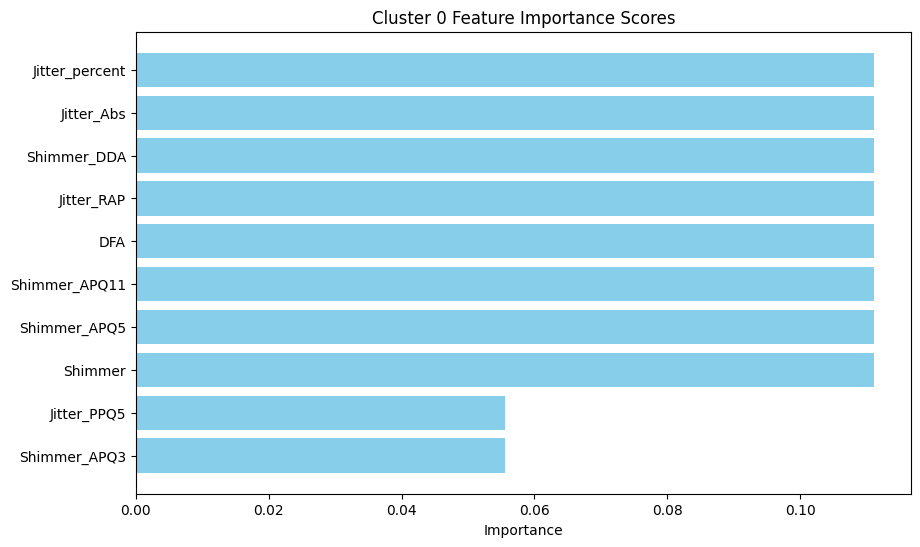

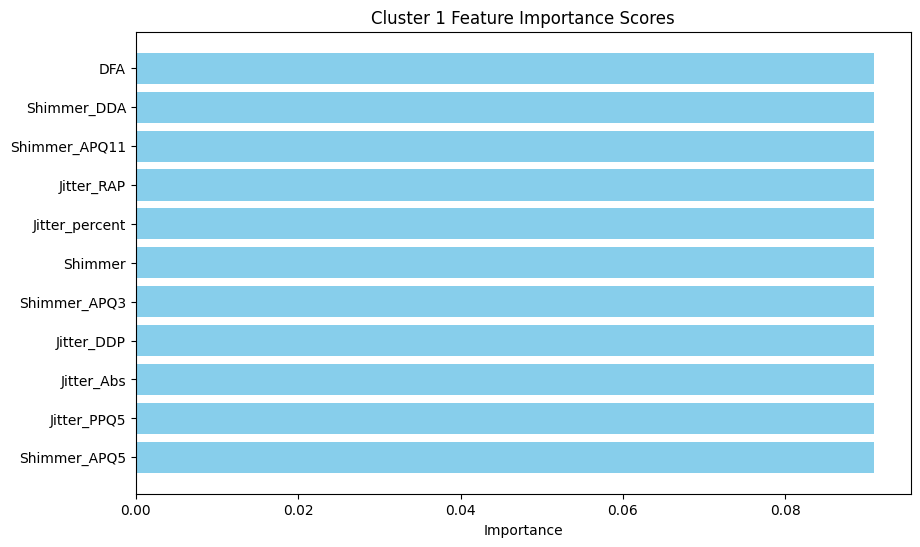

In [1244]:
best_chromosomes
all_features = [[condition["feature"] for condition in rule["conditions"]] for rule in rules]

# Convert features into numerical representation
unique_features = list(set(feature for rule_features in all_features for feature in rule_features))
numerical_representation = np.zeros((len(rules), len(unique_features)))

for i, rule_features in enumerate(all_features):
    for j, feature in enumerate(unique_features):
        if feature in rule_features:
            numerical_representation[i, j] = 1

# Perform unsupervised clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(numerical_representation)

# Analyze clusters for feature importance
cluster_feature_counts = {cluster: {} for cluster in range(num_clusters)}
for i, cluster_label in enumerate(cluster_labels):
    rule_features = all_features[i]
    for feature in rule_features:
        cluster_feature_counts[cluster_label][feature] = cluster_feature_counts[cluster_label].get(feature, 0) + 1

# Calculate feature importance scores for each cluster
cluster_feature_importance = {}
for cluster, feature_counts in cluster_feature_counts.items():
    total_occurrences = sum(feature_counts.values())
    cluster_feature_importance[cluster] = {feature: count / total_occurrences for feature, count in feature_counts.items()}

# Plot feature importance scores for each cluster
for cluster, importance_scores in cluster_feature_importance.items():
    sorted_importance_scores = dict(sorted(importance_scores.items(), key=lambda item: item[1], reverse=True))
    features = list(sorted_importance_scores.keys())
    importances = list(sorted_importance_scores.values())
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Cluster {cluster} Feature Importance Scores')
    plt.gca().invert_yaxis() 
    plt.show()